<font size="5"><b>Figure 1

Schematic summarizing waveform shape calculations

<b>Imports

In [15]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
#python packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pac

import seaborn as sns
sns.set_style('white')

import imp
import shape
import utils

imp.reload(utils)

<module 'utils' from '/Users/nick/Documents/brainwaves/Cole_2017-master/utils.py'>

<b> Load data and compute waveform shape metrics

In [3]:
widthS = 3
Fs, t, S, Sc, flo, fhi = utils.loadmeta()
eeg,rejects = utils.loadPD()
pks,trs,ShR,PTR,StR,RDR = utils.measure_shape(eeg,rejects, widthS=widthS)

/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.ar

<b>A  

First rising and falling zerocrossings are identified from the beta filtered signal. Then, peaks and troughs that lie between adjacent zerocrossings are found.

/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.ar

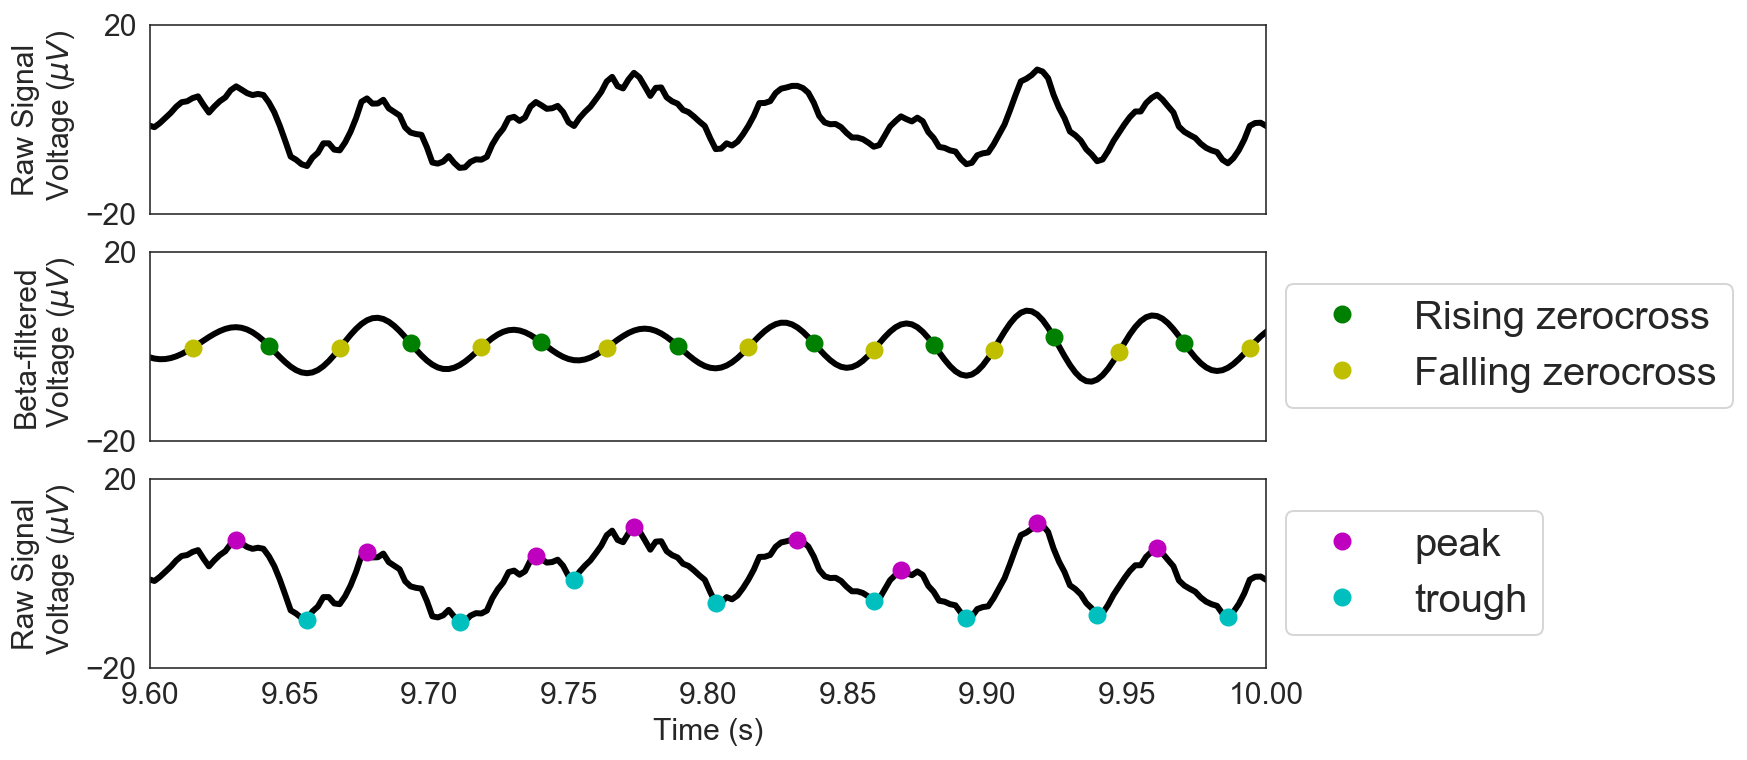

In [48]:
# Select one recording
group = 'off'
subj = 1
x = eeg[group][subj]
rejects0=0
w = 3
# Bandpass filter in beta frequency range
xbeta = utils.firf(x,0, flo, Fs, w = 3, rmvedge=False)
# Determine rising and falling zerocrossings.
pos = xbeta > 0
zerorises = (pos[:-1] & ~pos[1:]).nonzero()[0]
pos = xbeta < 0
zerofalls = (pos[:-1] & ~pos[1:]).nonzero()[0]

#data was checked so xlims fell in non-artifact region
xlim = (9.6,10)
ylim = (-20,20)

l=len(x)/Fs
t = np.arange(0, l, 1 / Fs)

fig = plt.figure(figsize=(10,8))
plt.subplot(4,1,1)
plt.plot(t, x,'k',linewidth=3)
plt.ylabel('Raw Signal\n Voltage ($\mu V$)',size=15)
plt.ylim(ylim)
plt.xlim(xlim)
plt.yticks(ylim,size=15)
plt.tick_params(labelsize=15)
plt.xticks(visible=False)

l=len(xbeta)/Fs
t = np.arange(0, l, 1 / Fs)

plt.subplot(4,1,2)
plt.plot(t, xbeta, 'k',linewidth=3)
plt.plot(t[zerorises], xbeta[zerorises], 'go', ms=8,label='Rising zerocross')
plt.plot(t[zerofalls], xbeta[zerofalls], 'yo', ms=8,label='Falling zerocross')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)
plt.ylabel('Beta-filtered\n Voltage ($\mu V$)',size=15)
plt.xlim(xlim)
plt.ylim(ylim)
plt.yticks(ylim,size=15)
plt.tick_params(labelsize=15)
plt.xticks(visible=False)

l=len(x)/Fs
t = np.arange(0, l, 1 / Fs)

plt.subplot(4,1,3)
plt.plot(t, x, 'k-',linewidth=3)
plt.plot(t[pks[group][subj]],x[pks[group][subj]],'mo', ms=8, label='peak')
plt.plot(t[trs[group][subj]],x[trs[group][subj]],'co', ms=8, label='trough')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)
plt.ylabel('Raw Signal\n Voltage ($\mu V$)',size=15)
plt.ylim(ylim)
plt.yticks(ylim,size=15)
plt.xlim(xlim)
plt.xlabel('Time (s)',size=15)
plt.tick_params(labelsize=15)
#plt.savefig('WaveformCalc.eps', format='eps', dpi=1000)

<b>B

Peak sharpness is calculated as the mean of the difference between the voltage 3 samples after the peak (first pink triangle) and the voltage at the peak (pink circle) and the voltage 3 samples before the peak (second pink triangle) and the voltage at the peak. The trough sharpness is calculated in a similar fashion. The yellow area, between a trough and subsequent peak, indicates an area where rise steepness is determined, while the green area, between a peak and subsequent peak, indicates an area where decay steepness is found.

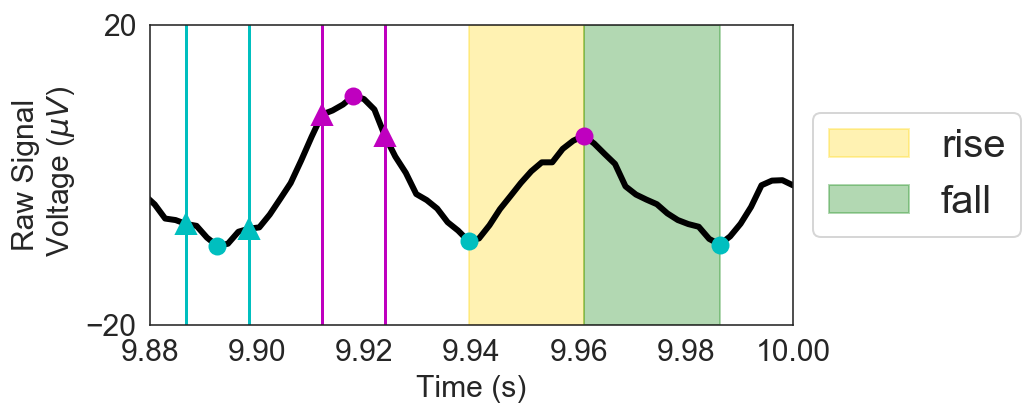

In [58]:
pkidx = 205#peak id
tridx = 205#trough id

xlim = (9.88,10)
ylim=(-20,20)

plt.figure(figsize=(6,3))
plt.plot(t, x, 'k-',linewidth=3)
plt.plot(t[pks[group][subj]],x[pks[group][subj]],'mo', ms=8)
plt.plot(t[trs[group][subj]],x[trs[group][subj]],'co', ms=8)
plt.plot([t[pks[group][subj][pkidx]]-widthS/Fs,t[pks[group][subj][pkidx]]-widthS/Fs],[-1000,1000],'m-')
plt.plot([t[pks[group][subj][pkidx]]+widthS/Fs,t[pks[group][subj][pkidx]]+widthS/Fs],[-1000,1000],'m-')
plt.plot([t[trs[group][subj][tridx]]-widthS/Fs,t[trs[group][subj][tridx]]-widthS/Fs],[-1000,1000],'c-')
plt.plot([t[trs[group][subj][tridx]]+widthS/Fs,t[trs[group][subj][tridx]]+widthS/Fs],[-1000,1000],'c-')
plt.plot(t[pks[group][subj][pkidx]-widthS],x[pks[group][subj][pkidx]-widthS],'m^',ms=10)
plt.plot(t[pks[group][subj][pkidx]+widthS],x[pks[group][subj][pkidx]+widthS],'m^',ms=10)
plt.plot(t[trs[group][subj][tridx]-widthS],x[trs[group][subj][tridx]-widthS],'c^',ms=10)
plt.plot(t[trs[group][subj][tridx]+widthS],x[trs[group][subj][tridx]+widthS],'c^',ms=10)

pkidx = 206#rise id
tridx = 206#fall id

rise=plt.axvspan(t[pks[group][subj][pkidx]],t[trs[group][subj][tridx+0]], color='gold', alpha=0.3,label='rise')
decay=plt.axvspan(t[trs[group][subj][tridx+1]],t[pks[group][subj][pkidx+0]], color='green', alpha=0.3,label='fall')
plt.legend([rise, decay], ["rise", "fall"])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)

plt.yticks(ylim,size=15)
plt.xlim(xlim)
plt.ylim(ylim)
plt.tick_params(labelsize=15)
plt.ylabel('Raw Signal\n Voltage ($\mu V$)',size=15)
plt.xlabel('Time (s)',size=15)
plt.tight_layout()

#plt.savefig('WaveformCalc2.eps', format='eps', dpi=1000)